# Preprocessing:

*Encode categorical data (e.g., 'Influencing Factor', 'Preferred Job') using one-hot encoding or MultiLabelBinarizer.



*Normalize numerical data (e.g., CGPA, skill ratings) using StandardScaler.


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


df = pd.read_csv("clean_data.csv")
columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert 'Prefer Job' and 'Influencing Factor' columns to string
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Splitting the multi-level categorical data into lists and strip extra spaces
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor'
mlb = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb.fit_transform(df['Influencing Factor']), columns=mlb.classes_, index=df.index)

# Using MultiLabelBinarizer for 'Prefer Job'
prefer_job_encoded = pd.DataFrame(mlb.fit_transform(df['Prefer Job']), columns=mlb.classes_, index=df.index)

# Combining encoded features with the original dataframe
df_encoded = pd.concat([df.drop(['Influencing Factor', 'Prefer Job'], axis=1), influencing_factors_encoded, prefer_job_encoded], axis=1)

df_encoded.head()
#df_encoded.to_csv("preprocess_data.csv")

,cgpa,Critical Thinking,Problem Solving,Team Work,Communication Skill,Software Engineering Principal,Data Structure & Algorithm,Database Management,Data Analysis skill,Web Developing Skill,...,Govt Job,Hardware Sector,ML/AI Engineer,Management,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing
0,3.84,2,3,3,2,3,3,2,2,3,...,0,0,0,0,0,0,0,1,1,0
1,2.50,1,1,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,1,0
2,3.34,2,2,2,1,1,2,2,1,2,...,0,0,0,0,0,0,0,1,0,0
3,3.78,2,3,2,2,2,2,2,1,2,...,0,0,0,0,0,0,0,1,0,0
4,3.00,2,3,3,2,2,2,3,3,3,...,0,0,0,0,0,0,0,1,0,0


# Feature Engineering:
*Create new features by combining existing ones, such as average skill rating or the total number of projects/publications.



*Use Principal Component Analysis (PCA) to reduce the dimensionality of the data.

In [31]:
import pandas as pd
skills_df = pd.read_csv('Skills_list.csv')
skills = skills_df.iloc[:, 0].tolist()
#skills

df_encoded['Average Skill Rating'] = df_encoded[skills].mean(axis=1)

# Example: Calculate total projects and publications
df_encoded['Total Projects/Publications'] = df_encoded['project'] + df_encoded['publication']

# Example: Count skills rated above a certain threshold
threshold = 2  # Example threshold for skill rating
df_encoded['Skill Diversity'] = (df_encoded[skills] > threshold).sum(axis=1)

# Example: Create a feature for Machine Learning and Data Analysis combination
df_encoded['ML_DA_Combination'] = (df_encoded['Machine Learning Skill'] > 0) & (df_encoded['Data Analysis skill'] > 0)

df_encoded.head()

,cgpa,Critical Thinking,Problem Solving,Team Work,Communication Skill,Software Engineering Principal,Data Structure & Algorithm,Database Management,Data Analysis skill,Web Developing Skill,...,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing,Average Skill Rating,Total Projects/Publications,Skill Diversity,ML_DA_Combination
0,3.84,2,3,3,2,3,3,2,2,3,...,0,0,0,1,1,0,1.833684,3,6,True
1,2.50,1,1,1,1,1,1,1,1,2,...,0,0,0,0,1,0,1.026316,0,1,True
2,3.34,2,2,2,1,1,2,2,1,2,...,0,0,0,1,0,0,1.438947,2,1,True
3,3.78,2,3,2,2,2,2,2,1,2,...,0,0,0,1,0,0,1.725263,1,2,True
4,3.00,2,3,3,2,2,2,3,3,3,...,0,0,0,1,0,0,2.315789,5,9,True


# Principal Component Analysis (PCA)

Explained variance ratio: [0.19952798 0.07828794 0.05671501 0.0551711  0.04279966 0.04213798
 0.03555744 0.03146324 0.02835046 0.02670578 0.02492058 0.02388963]


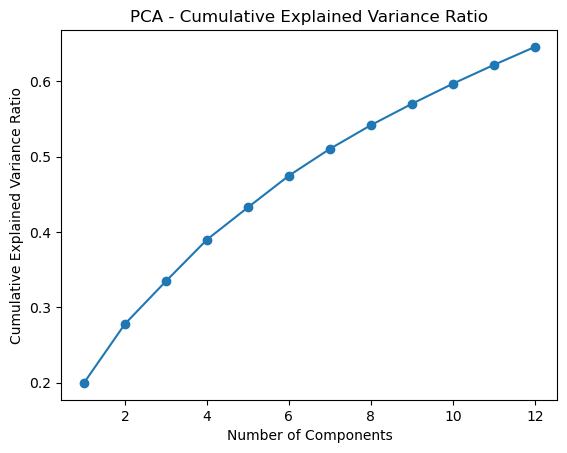

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt  

# Assuming df_encoded and other variables are defined as in your previous code

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)  # Assuming 'Student ID' is not a feature

# Initialize PCA with desired number of components
n_components = 12  # Example: Reduce to 10 principal components
pca = PCA(n_components=n_components)

# Fit PCA and transform data
pca_result = pca.fit_transform(scaled_data)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize cumulative explained variance ratio
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.show()


# check every prefer job accuracy

In [34]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

# Load data
df = pd.read_csv("clean_data.csv")
columns_to_drop = ['Unnamed: 0', 'year', 'gender', 'university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string and apply MultiLabelBinarizer
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)
# Drop original columns and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']  
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split data into features and labels
X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded

# Standardize numerical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\n")


# Logistic Regression

In [37]:
# Logistic Regression
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

estimators = [
    ('lr', LogisticRegression(max_iter=10000, random_state=42))
]
stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Pipeline for feature scaling and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Retain 95% variance
    ('classifier', stacked_model)
])

# Hyperparameter Tuning with RandomizedSearch
param_dist = {
    'classifier__final_estimator__C': uniform(0.01, 10),
    'classifier__final_estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__final_estimator__solver': ['saga']
}
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=50, scoring='f1_micro', cv=5, random_state=42, verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)
lr = grid_search.best_estimator_

y_pred_lr = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Hamming Loss:", hamming_loss(y_test, y_pred_lr))
print("F1 Score (micro):", f1_score(y_test, y_pred_lr, average='micro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_lr, average='macro'))

NameError: name 'grid_search' is not defined

# Decision Tree

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

# Define the base Random Forest model
base_rf = RandomForestClassifier(random_state=42)

# Set up a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(base_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, n_iter=10)
multi_output_rf = MultiOutputClassifier(random_search)

# Fit the model on the training data
multi_output_rf.fit(X_train, y_train)

# Feature Importance (optional: for numerical features only)
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': multi_output_rf.estimators_[0].best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)


# Evaluate the optimized model
evaluate_model(y_test, y_pred_test,"Dicision Tree")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

NameError: name 'y_pred_test' is not defined

# Randorm Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# no of trees in random forest
n_estimators=[20,60,100,120]
# no of features
max_features=[0.2,0.6,1.0]
# max depth
max_depth=[5,8,10]
# max samples
max_samples=[0.5,0.75,1.0]
min_samples_split= [2, 5, 10]
min_samples_leaf= [1, 2, 4]

# 108 different random forest train

param_grid={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "max_samples":max_samples,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    'bootstrap': [True, False]
}
#print(param_grid)

rf=RandomForestClassifier()
rf_grid=GridSearchCV(estimator=rf,
                     param_grid=param_grid,
                     cv=5,
                     verbose=2,
                     n_jobs=-1)
rf_grid.fit(X_train,y_train)

print(rf_grid.best_score_)
rf_grid.best_params_

y_pred_rf = rf_grid.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred_rf, "Random Forest")

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = MultiOutputClassifier(RandomForestClassifier(random_state=5))
model.fit(X_train, y_train)

# Make predictions
y_pred_rf = model.predict(X_test)

evaluate_model(y_test, y_pred_rf, "Random Forest")

In [ ]:
# Random Forest
rf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate_model(y_test, y_pred_rf, "Random Forest")



In [ ]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_regression(n_samples=1000, n_features=20, n_targets=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multi-output SVR
model = MultiOutputRegressor(SVR())
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred, "Random Forest")

# Gradient Boosting

In [ ]:
# Gradient Boosting
gb = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
evaluate_model(y_test, y_pred_gb, "Random Forest")

# XGBoost Classifier

In [105]:
#XGBoost Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
'''
# Define the parameter grid
param_grid = {
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 5, 10],
    'estimator__n_estimators': [100, 200, 300],
    'estimator__subsample': [0.8, 1.0],
    'estimator__colsample_bytree': [0.8, 1.0],
}

# Grid Search with Cross Validation
grid_search = GridSearchCV(OneVsRestClassifier(xgb.XGBClassifier(random_state=42)),param_grid=param_grid,
    cv=3,scoring='accuracy',verbose=1,n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_   '''

xgb_model = OneVsRestClassifier(xgb.XGBClassifier(random_state=42))
xgb_model.fit(X_train, y_train)

# Predict using the best model
y_pred_xgb = xgb_model.predict(X_test)

evaluate_model(y_test, y_pred_xgb, "Random Forest")

Results for Random Forest:
Accuracy: 41.18%
Hamming Loss: 0.06928104575163399
F1 Score (micro): 0.6954022988505747
F1 Score (macro): 0.5938438104316196




# Hard Voting Classifier

In [88]:
# Hard Voting Classifier
hard_voting = MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=100000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='hard'))
hard_voting.fit(X_train, y_train)
y_pred_hv = hard_voting.predict(X_test)
evaluate_model(y_test, y_pred_hv, "Hard Voting")

Results for Hard Voting:
Accuracy: 43.02%
Hamming Loss: 0.06524547803617571
F1 Score (micro): 0.6752411575562701
F1 Score (macro): 0.46786643878842454




C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Soft Voting Classifier

In [89]:
# Soft Voting Classifier
soft_voting = MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=100000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='soft'))
soft_voting.fit(X_train, y_train)
y_pred_sv = soft_voting.predict(X_test)
evaluate_model(y_test, y_pred_sv, "Soft Voting")

Results for Soft Voting:
Accuracy: 43.02%
Hamming Loss: 0.06718346253229975
F1 Score (micro): 0.6867469879518072
F1 Score (macro): 0.5099168008588298




C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Support Vector Machines (SVM)

In [9]:
# Support Vector Machines (SVM)
svm = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
evaluate_model(y_test, y_pred_svm, "SVM")

NameError: name 'SVC' is not defined

# Neural Network Classifier

In [91]:
# Neural Network Classifier
nn = MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

evaluate_model(y_test, y_pred_nn, "Neural Network")

Results for Neural Network:
Accuracy: 46.51%
Hamming Loss: 0.07428940568475452
F1 Score (micro): 0.6723646723646723
F1 Score (macro): 0.5590556327564045




C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Function to create a DataFrame with algorithms as rows and job categories as columns
def predictions_to_dataframe(y_preds, model_names, job_categories):
    predictions_dict = {}
    for y_pred, model_name in zip(y_preds, model_names):
        model_predictions = []
        for category in job_categories:
            prediction_percentage = (y_pred[:, mlb_prefer_job.classes_ == category].sum() / len(y_pred)) * 100
            model_predictions.append(f"{prediction_percentage:.2f}%")
        predictions_dict[model_name] = model_predictions
    predictions_df = pd.DataFrame(predictions_dict, index=job_categories)
    return predictions_df

# Get job categories from MultiLabelBinarizer
job_categories = mlb_prefer_job.classes_

# Collect predictions and model names
y_preds = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_gb, y_pred_hv, y_pred_sv,y_pred_svm, y_pred_nn]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost Classifier", 
               "Gradient Boosting", "Hard Voting Classifier", "Soft Voting Classifier","SVM","Neural Network"]


predictions_df = predictions_to_dataframe(y_preds, model_names, job_categories)

predictions_df = predictions_df.T
#predictions_df.to_csv('predictions.csv')

predictions_df

,Abroad,BCS,Bank Job,Business,Cyber Security,Data Analysis,Database Administration,Gaming,Govt Job,Hardware Sector,ML/AI Engineer,Management,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing
Logistic Regression,17.44%,4.65%,3.49%,2.33%,6.98%,9.30%,1.16%,1.16%,4.65%,1.16%,13.95%,0.00%,6.98%,4.65%,12.79%,53.49%,5.81%,0.00%
Decision Tree,26.74%,11.63%,9.30%,5.81%,12.79%,13.95%,10.47%,0.00%,13.95%,0.00%,18.60%,6.98%,12.79%,6.98%,15.12%,53.49%,22.09%,3.49%
Random Forest,16.28%,2.33%,1.16%,2.33%,8.14%,6.98%,1.16%,0.00%,4.65%,0.00%,11.63%,3.49%,2.33%,6.98%,12.79%,55.81%,5.81%,0.00%
XGBoost Classifier,19.77%,6.98%,5.81%,4.65%,11.63%,13.95%,3.49%,0.00%,4.65%,1.16%,13.95%,4.65%,4.65%,6.98%,11.63%,55.81%,5.81%,2.33%
Gradient Boosting,18.60%,5.81%,5.81%,2.33%,9.30%,9.30%,4.65%,0.00%,4.65%,0.00%,11.63%,4.65%,3.49%,6.98%,13.95%,53.49%,9.30%,0.00%
Hard Voting Classifier,19.77%,3.49%,1.16%,3.49%,8.14%,8.14%,1.16%,0.00%,4.65%,0.00%,12.79%,3.49%,3.49%,6.98%,12.79%,56.98%,5.81%,0.00%
Soft Voting Classifier,23.26%,8.14%,1.16%,3.49%,9.30%,11.63%,3.49%,0.00%,8.14%,0.00%,13.95%,3.49%,3.49%,6.98%,10.47%,54.65%,9.30%,1.16%
SVM,16.28%,3.49%,2.33%,0.00%,6.98%,10.47%,0.00%,1.16%,1.16%,2.33%,13.95%,0.00%,0.00%,6.98%,12.79%,51.16%,0.00%,0.00%
Neural Network,19.77%,4.65%,5.81%,4.65%,9.30%,11.63%,5.81%,1.16%,9.30%,0.00%,13.95%,3.49%,4.65%,4.65%,18.60%,54.65%,9.30%,1.16%


# check Accuracy & Hamming Loss:

In [31]:
# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\n")

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_xgb, "XGBoost Classifier")
evaluate_model(y_test, y_pred_hv, "Hard Voting Classifier")
evaluate_model(y_test, y_pred_sv, "Soft Voting Classifier")
evaluate_model(y_test, y_pred_nn, "Neural Network")
evaluate_model(y_test, y_pred_svm, "SVM")

Results for Logistic Regression:
Accuracy: 16.28%
Hamming Loss: 0.10852713178294573
F1 Score (micro): 0.4846625766871166
F1 Score (macro): 0.28873587496775904


Results for Decision Tree:
Accuracy: 37.21%
Hamming Loss: 0.10400516795865633
F1 Score (micro): 0.6044226044226044
F1 Score (macro): 0.4680448794343853


Results for Random Forest:
Accuracy: 47.67%
Hamming Loss: 0.0665374677002584
F1 Score (micro): 0.677115987460815
F1 Score (macro): 0.4885383448579247


Results for Gradient Boosting:
Accuracy: 41.86%
Hamming Loss: 0.0710594315245478
F1 Score (micro): 0.6745562130177515
F1 Score (macro): 0.4936730338904252


Results for XGBoost Classifier:
Accuracy: 52.33%
Hamming Loss: 0.059431524547803614
F1 Score (micro): 0.7371428571428571
F1 Score (macro): 0.630696860991674


Results for Hard Voting Classifier:
Accuracy: 47.67%
Hamming Loss: 0.06718346253229975
F1 Score (micro): 0.6829268292682926
F1 Score (macro): 0.49049256949901565


Results for Soft Voting Classifier:
Accuracy: 46.51%


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-

# XGBoost 

In [8]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb


df = pd.read_csv('clean_data.csv')

columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string 
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job'] 
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)


# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("full data shape :",X.shape)
print("training data shape : ",X_train.shape)
print("test data shape : ",X_test.shape)

# XGBoost Classifier
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
xgb_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained XGBoost model
    y_pred_prob = xgb_model.predict_proba(input_df)


    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.9,
    'Critical Thinking': 2,
    'Problem Solving': 0,
    'Team Work': 0,
    'Communication Skill': 2,
    'Software Engineering Principal': 1,
    'Data Structure & Algorithm': 2,
    'Database Management': 2,
    'Data Analysis skill': 2,
    'Web Developing Skill': 0,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1, 
    'Robotics Skill': 0,
    'Research Skill': 3,
    'publication': 5,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


full data shape : (430, 25)
training data shape :  (344, 25)
test data shape :  (86, 25)
Predicted Prefer Job Categories with Probabilities (Descending Order):
Abroad: 94.67%
Researcher: 36.08%
Teaching: 4.82%
Cyber Security: 1.88%
Data Analysis: 1.66%
Software Development: 1.52%
UI/UX Designing: 1.14%
Database Administration: 0.72%
Gaming: 0.67%
Networking: 0.25%
Business: 0.19%
Management: 0.19%
ML/AI Engineer: 0.17%
Bank Job: 0.16%
Other: 0.13%
BCS: 0.09%
Hardware Sector: 0.04%
Govt Job: 0.02%


# Support Vector Machines (SVM)

In [18]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Assuming you have already read and processed your data similar to previous examples
df = pd.read_csv('clean_data.csv')

columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machines (SVM)
svm_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Train the SVM model
svm_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained SVM model
    y_pred_prob = svm_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.9,
    'Critical Thinking': 2,
    'Problem Solving': 0,
    'Team Work': 0,
    'Communication Skill': 2,
    'Software Engineering Principal': 1,
    'Data Structure & Algorithm': 2,
    'Database Management': 2,
    'Data Analysis skill': 2,
    'Web Developing Skill': 0,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1, 
    'Robotics Skill': 0,
    'Research Skill': 3,
    'publication': 5,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)
y_pred= svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


0.22093023255813954
Predicted Prefer Job Categories with Probabilities (Descending Order):
Abroad: 97.15%
Researcher: 74.96%
Data Analysis: 41.94%
Software Development: 14.93%
Networking: 14.82%
Teaching: 13.88%
BCS: 13.78%
Govt Job: 13.14%
Database Administration: 12.00%
Bank Job: 7.02%
Cyber Security: 6.82%
Management: 6.00%
UI/UX Designing: 5.32%
Other: 5.29%
ML/AI Engineer: 3.37%
Business: 1.19%
Gaming: 0.19%
Hardware Sector: 0.11%


# RandomForestClassifier

In [19]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Assuming you have already read and processed your data similar to previous examples
df = pd.read_csv('clean_data.csv')

columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string if necessary (already done in your case)
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest Classifier
rfc_model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
rfc_model.fit(X_train, y_train)

y_pred= rfc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_, index=input_df.index)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained RandomForest model
    y_pred_prob = rfc_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.9,
    'Critical Thinking': 2,
    'Problem Solving': 0,
    'Team Work': 0,
    'Communication Skill': 2,
    'Software Engineering Principal': 1,
    'Data Structure & Algorithm': 2,
    'Database Management': 2,
    'Data Analysis skill': 2,
    'Web Developing Skill': 0,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1, 
    'Robotics Skill': 0,
    'Research Skill': 3,
    'publication': 5,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


0.47674418604651164
Predicted Prefer Job Categories with Probabilities (Descending Order):
Abroad: 80.00%
Researcher: 51.00%
Data Analysis: 27.00%
ML/AI Engineer: 27.00%
Software Development: 26.00%
Other: 20.00%
Teaching: 20.00%
Cyber Security: 19.00%
Bank Job: 18.00%
BCS: 14.00%
Database Administration: 12.00%
Govt Job: 8.00%
Management: 7.00%
Business: 6.00%
Gaming: 6.00%
UI/UX Designing: 6.00%
Hardware Sector: 3.00%
Networking: 2.00%


# Neural Networks

In [11]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

# Assuming you have already read and processed your data similar to previous examples
df = pd.read_csv('clean_data.csv')

columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string if necessary (already done in your case)
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP Classifier
mlp_model = OneVsRestClassifier(MLPClassifier(random_state=42, max_iter=1000))
mlp_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_, index=input_df.index)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained MLP model
    y_pred_prob = mlp_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.7,
    'Critical Thinking': 1,
    'Problem Solving': 3,
    'Team Work': 3,
    'Communication Skill': 2,
    'Software Engineering Principal': 3,
    'Data Structure & Algorithm': 2,
    'Database Management': 3,
    'Data Analysis skill': 2,
    'Web Developing Skill': 2,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1,  # Check spelling against X_train columns
    'Robotics Skill': 0,
    'Research Skill': 0,
    'publication': 0,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


Predicted Prefer Job Categories with Probabilities (Descending Order):
Software Development: 100.00%
ML/AI Engineer: 27.57%
Other: 4.13%
Data Analysis: 2.80%
Database Administration: 1.33%
Cyber Security: 0.52%
Management: 0.46%
Abroad: 0.01%
Business: 0.00%
UI/UX Designing: 0.00%
Gaming: 0.00%
Teaching: 0.00%
Researcher: 0.00%
Govt Job: 0.00%
Hardware Sector: 0.00%
Networking: 0.00%
Bank Job: 0.00%
BCS: 0.00%


# LogisticRegression

In [12]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Read CSV file
df = pd.read_csv('clean_data.csv')

columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string if necessary (already done in your case)
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

print(prefer_job_encoded)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with OneVsRestClassifier
lr_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))  # Increase max_iter if necessary
lr_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_, index=input_df.index)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained Logistic Regression model
    y_pred_prob = lr_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.7,
    'Critical Thinking': 1,
    'Problem Solving': 2,
    'Team Work': 3,
    'Communication Skill': 2,
    'Software Engineering Principal': 2,
    'Data Structure & Algorithm': 2,
    'Database Management': 3,
    'Data Analysis skill': 2,
    'Web Developing Skill': 2,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1,  # Check spelling against X_train columns
    'Robotics Skill': 0,
    'Research Skill': 0,
    'publication': 0,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


     Abroad  BCS  Bank Job  Business  Cyber Security  Data Analysis  \
0         0    0         0         0               0              0   
1         0    0         0         0               0              0   
2         0    0         0         0               0              0   
3         0    0         0         0               0              0   
4         0    0         0         0               0              0   
..      ...  ...       ...       ...             ...            ...   
425       0    0         0         0               0              0   
426       0    1         1         0               0              0   
427       1    0         0         0               0              0   
428       0    0         0         0               0              1   
429       0    0         0         0               0              0   

     Database Administration  Gaming  Govt Job  Hardware Sector  \
0                          0       0         0                0   
1            

# Model Evaluation:

*Evaluate the models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.



*Use cross-validation to ensure the model's robustness.

In [13]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb

# Load your CSV file
df = pd.read_csv("clean_data.csv")

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Unnamed: 0','year','gender','university_name']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)


# Convert 'Prefer Job' and 'Influencing Factor' columns to string and split into lists
df['Prefer Job'] = df['Prefer Job'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Influencing Factor'] = df['Influencing Factor'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)

# Drop original columns and combine encoded features with the dataframe
columns_to_drop = ['Influencing Factor', 'Prefer Job']
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Splitting the data into features and labels
X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (excluding categorical columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=10000, random_state=42)),
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier(random_state=42)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    'XGBoost Classifier': OneVsRestClassifier(xgb.XGBClassifier(random_state=42)),
    'Hard Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='hard')),
    'Soft Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='soft'))
}

# Define evaluation metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']

# Perform cross-validation and evaluate models
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    # Extract and print evaluation metrics
    accuracy = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision_macro'].mean()
    recall = cv_results['test_recall_macro'].mean()
    #f1 = cv_results['test_f1_macro'].mean()
   # roc_auc = cv_results['test_roc_auc_ovr'].mean()
    
    print(f"Cross-validation results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    #print(f"F1-score: {f1:.2f}")
   # print(f"ROC-AUC: {roc_auc:.2f}")
    print("\n")


Evaluating Logistic Regression...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Logistic Regression:
Accuracy: 0.15
Precision: 0.41
Recall: 0.22


Evaluating Decision Tree...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 401, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py", line 634, in roc_auc_score
    return _average_binary_score(
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anacond

Cross-validation results for Decision Tree:
Accuracy: 0.33
Precision: 0.48
Recall: 0.51


Evaluating Random Forest...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Random Forest:
Accuracy: 0.44
Precision: 0.70
Recall: 0.44


Evaluating Gradient Boosting...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Gradient Boosting:
Accuracy: 0.32
Precision: 0.63
Recall: 0.43


Evaluating XGBoost Classifier...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for XGBoost Classifier:
Accuracy: 0.40
Precision: 0.64
Recall: 0.51


Evaluating Hard Voting Classifier...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Hard Voting Classifier:
Accuracy: 0.42
Precision: 0.69
Recall: 0.44


Evaluating Soft Voting Classifier...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Soft Voting Classifier:
Accuracy: 0.39
Precision: 0.67
Recall: 0.48




C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 401, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py", line 605, in roc_auc_score
    y_score = check_array(y_score, ensure_2d=False)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [20]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb

# Load your CSV file
df = pd.read_csv("rrr_data.csv")

# Convert 'Prefer Job' and 'Influencing Factor' columns to string and split into lists
df['Prefer Job'] = df['Prefer Job'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Influencing Factor'] = df['Influencing Factor'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)

# Drop original columns and combine encoded features with the dataframe
columns_to_drop = ['Influencing Factor', 'Prefer Job']
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Splitting the data into features and labels
X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (excluding categorical columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=10000, random_state=42)),
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier(random_state=42)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    'XGBoost Classifier': OneVsRestClassifier(xgb.XGBClassifier(random_state=42)),
    'Hard Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='hard')),
    'Soft Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='soft'))
}

# Define evaluation metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']

# Perform cross-validation and evaluate models
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    # Extract and print evaluation metrics
    accuracy = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision_macro'].mean()
    recall = cv_results['test_recall_macro'].mean()
    f1 = cv_results['test_f1_macro'].mean()
    roc_auc = cv_results['test_roc_auc_ovr'].mean()
    
    print(f"Cross-validation results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("\n")


Evaluating Logistic Regression...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Logistic Regression:
Accuracy: 0.23
Precision: 0.38
Recall: 0.23
F1-score: 0.26
ROC-AUC: nan


Evaluating Decision Tree...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Decision Tree:
Accuracy: 0.24
Precision: 0.47
Recall: 0.54
F1-score: 0.49
ROC-AUC: nan


Evaluating Random Forest...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Random Forest:
Accuracy: 0.46
Precision: 0.62
Recall: 0.38
F1-score: 0.45
ROC-AUC: nan


Evaluating Gradient Boosting...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\HP

Cross-validation results for Gradient Boosting:
Accuracy: 0.44
Precision: 0.63
Recall: 0.49
F1-score: 0.52
ROC-AUC: nan


Evaluating XGBoost Classifier...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for XGBoost Classifier:
Accuracy: 0.39
Precision: 0.55
Recall: 0.40
F1-score: 0.44
ROC-AUC: nan


Evaluating Hard Voting Classifier...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-pack

Cross-validation results for Hard Voting Classifier:
Accuracy: 0.39
Precision: 0.58
Recall: 0.37
F1-score: 0.43
ROC-AUC: nan


Evaluating Soft Voting Classifier...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Soft Voting Classifier:
Accuracy: 0.42
Precision: 0.62
Recall: 0.50
F1-score: 0.53
ROC-AUC: nan




C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 401, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py", line 605, in roc_auc_score
    y_score = check_array(y_score, ensure_2d=False)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [21]:
import numpy as np

# Update softmax prediction logic for multi-label classification
def predict_with_threshold(model, X_test, threshold=0.5):
    # Get the probability distribution (predict_proba) for models that support it
    proba = model.predict_proba(X_test)
    
    # Convert probabilities into binary predictions based on the threshold
    # proba is a list of arrays, so we iterate over it and apply the threshold
    return np.array([np.where(p >= threshold, 1, 0) for p in proba]).T

# Evaluate models using thresholded predictions for multi-label classification
def evaluate_model_thresholded(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\n")

# Apply the new threshold-based prediction and evaluation for each model
y_pred_lr_threshold = predict_with_threshold(lr, X_test)
evaluate_model_thresholded(y_test, y_pred_lr_threshold, "Logistic Regression")

y_pred_rf_threshold = predict_with_threshold(rf, X_test)
evaluate_model_thresholded(y_test, y_pred_rf_threshold, "Random Forest")

y_pred_gb_threshold = predict_with_threshold(gb, X_test)
evaluate_model_thresholded(y_test, y_pred_gb_threshold, "Gradient Boosting")

y_pred_xgb_threshold = predict_with_threshold(xgb_model, X_test)
evaluate_model_thresholded(y_test, y_pred_xgb_threshold, "XGBoost Classifier")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Leadership & Professional Attitude
- Mass Communication
- Professional Writing
- Public Speaking
- Unnamed: 0
- ...
Feature names seen at fit time, yet now missing:
- Communication Skill
- Other Factor
